# Using derivative module
This contains a small script on how to perform multi-point first and
second numercial derivates comparing them to the expected result. Here,
we try to approximate the first and second derivatives of $y = ln(x)$
with a displacement of 0.1, 0.5, 1.0, and 1.5. We then show the
improvement of the numercial derivative as we start to include more
data points to the derivative. We have implemented code to calculate
the numerical derivative with two, four, six, and eight symmetric
displacment points. For the second derivative there is an extra point
as the data from the equilibrium position is required. We use $y=ln(x)$
as it has a very simple analytical first and second derivative of $1/x$
and $-1/x^2$, respectively.

In [1]:
from vibrav.numerical.derivatives import (two_point_1d, four_point_1d, six_point_1d, eight_point_1d,
                                          two_point_2d, four_point_2d, six_point_2d, eight_point_2d)
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
def do_derivs(delta, base, steps, stdout=False, first=True):
    x = np.linspace(base-delta*steps/2,base+delta*steps/2,steps+1)
    y = np.log(x)
    y_plus = y[-int(steps/2):]
    y_minus = np.flip(y[:int(steps/2)])
    y_equil = y[int(steps/2)]
    if first:
        actual = 1/base
        d_eight = eight_point_1d(y_plus[:4], y_minus[:4], delta)
        d_six = six_point_1d(y_plus[:3], y_minus[:3], delta)
        d_four = four_point_1d(y_plus[:2], y_minus[:2], delta)
        d_two = two_point_1d(y_plus[:1], y_minus[:1], delta)
    else:
        actual = -1/base**2
        d_eight = eight_point_2d(y_plus[:4], y_minus[:4], y_equil, delta)
        d_six = six_point_2d(y_plus[:3], y_minus[:3], y_equil, delta)
        d_four = four_point_2d(y_plus[:2], y_minus[:2], y_equil, delta)
        d_two = two_point_2d(y_plus[:1], y_minus[:1], y_equil, delta)
    cols = ['actual', 'delta']+[x+'-point' for x in ['two', 'four', 'six', 'eight']]
    df = pd.Series([actual, delta, d_two, d_four, d_six, d_eight], index=cols)
    return df

def gen_plot(fig_num, deltas, base, steps):
    fig = plt.figure(fig_num, figsize=(8,8), dpi=100)
    for i, delta in enumerate(deltas):
        ax = fig.add_subplot(2, 2, i+1)
        x = np.linspace(base-delta*steps/2,base+delta*steps/2,steps+1)
        y = np.log(x)
        ax.axvline(base, color='k', linewidth=0.7)
        ax.plot(x, y, label="Delta: {:.1f}".format(delta))
        act_x = np.linspace(base-delta*steps/2,base+delta*steps/2,1000)
        act_y = np.log(act_x)
        ax.plot(act_x, act_y, label="Actual")
        ax.legend(frameon=False, loc='upper left')
        ax.text(0.52, 0.05, 'x = {:.2f}'.format(base), va='bottom', ha='left',
                transform=ax.transAxes, fontweight='bold')

## Setting $x=7.8$
\begin{equation}
\frac{d}{dx}~ln(7.8) = 0.128205 ~~~~~~~~ \frac{d^2}{dx^2}~ln(7.8) = -0.016437
\end{equation}
### Plots with the numerical vs. actual values

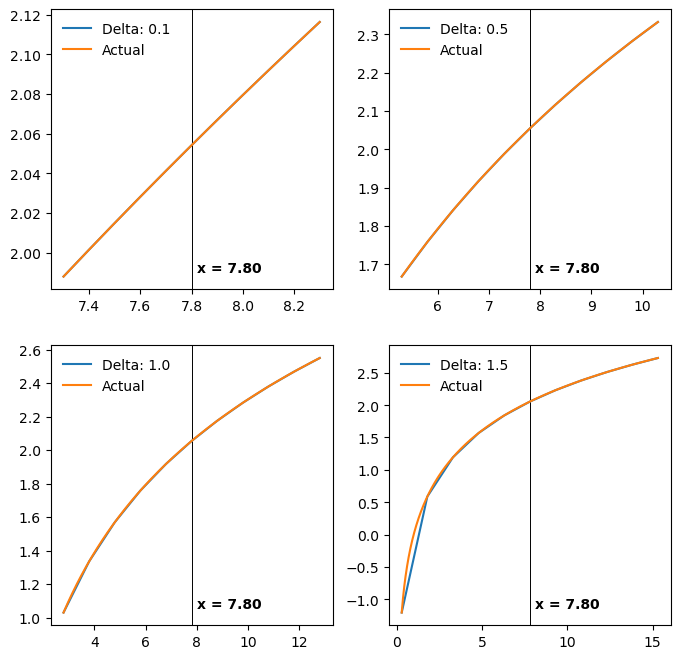

In [3]:
gen_plot(1, [0.1, 0.5, 1, 1.5], 7.8, 10)

### Numerical first derivative for delta of 0.1, 0.5, 1.0, and 1.5

In [4]:
derivs_1d = []
for d, delta in enumerate([0.1, 0.5, 1, 1.5]):
    df = do_derivs(delta, base=7.8, steps=10)
    df['index'] = d
    derivs_1d.append(df)
derivs_1d = pd.concat(derivs_1d, axis=1).T
derivs_1d['index'] = derivs_1d['index'].astype(int)
derivs_1d

,actual,delta,two-point,four-point,six-point,eight-point,index
0,0.128205,0.1,0.128212,0.128205,0.128205,0.128205,0
1,0.128205,0.5,0.128381,0.128203,0.128205,0.128205,1
2,0.128205,1.0,0.128915,0.128176,0.128209,0.128204,2
3,0.128205,1.5,0.129822,0.128044,0.128258,0.128155,3


### Numerical second derivative for delta of 0.1, 0.5, 1.0, and 1.5

In [5]:
derivs_2d = []
for d, delta in enumerate([0.1, 0.5, 1.0, 1.5]):
    df = do_derivs(delta, base=7.8, steps=10, first=False)
    df['index'] = d
    derivs_2d.append(df)
derivs_2d = pd.concat(derivs_2d, axis=1).T
derivs_2d['index'] = derivs_2d['index'].astype(int)
derivs_2d

,actual,delta,two-point,four-point,six-point,eight-point,index
0,-0.016437,0.1,-0.016438,-0.016437,-0.016437,-0.016437,0
1,-0.016437,0.5,-0.016470,-0.016436,-0.016437,-0.016437,1
2,-0.016437,1.0,-0.016573,-0.016430,-0.016437,-0.016436,2
3,-0.016437,1.5,-0.016748,-0.016402,-0.016449,-0.016425,3


## Setting $x=2.51$

\begin{equation}
\frac{d}{dx}~ln(2.51) = 0.398406 ~~~~~~~~ \frac{d^2}{dx^2}~ln(2.51) = -0.158728
\end{equation}
### Plots with the numerical vs. actual values

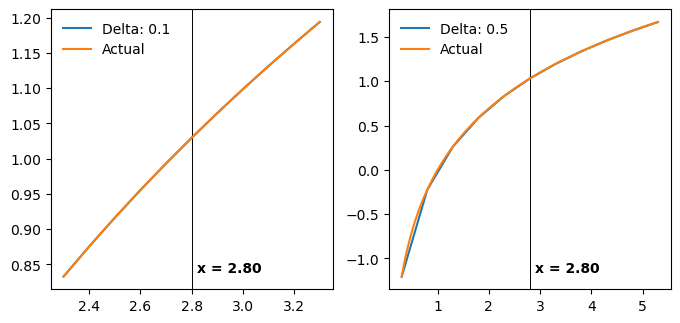

In [6]:
gen_plot(2, [0.1, 0.5], 2.8, 10)

### Numerical first derivative for delta of 0.1, and 0.5

In [7]:
derivs_1d = []
for d, delta in enumerate([0.1, 0.5]):
    df = do_derivs(delta, base=2.51, steps=10)
    df['index'] = d
    derivs_1d.append(df)
derivs_1d = pd.concat(derivs_1d, axis=1).T
derivs_1d['index'] = derivs_1d['index'].astype(int)
derivs_1d

,actual,delta,two-point,four-point,six-point,eight-point,index
0,0.398406,0.1,0.398617,0.398406,0.398406,0.398406,0
1,0.398406,0.5,0.403805,0.397823,0.398617,0.398172,1


### Numerical second derivative for delta of 0.1, and 0.5

In [8]:
derivs_2d = []
for d, delta in enumerate([0.1, 0.5]):
    df = do_derivs(delta, base=2.51, steps=10, first=False)
    df['index'] = d
    derivs_2d.append(df)
derivs_2d = pd.concat(derivs_2d, axis=1).T
derivs_2d['index'] = derivs_2d['index'].astype(int)
derivs_2d

,actual,delta,two-point,four-point,six-point,eight-point,index
0,-0.158728,0.1,-0.158854,-0.158727,-0.158728,-0.158728,0
1,-0.158728,0.5,-0.161963,-0.158337,-0.158877,-0.158555,1


## Setting $x=0.51$

\begin{equation}
\frac{d}{dx}~ln(0.51) = 1.960784 ~~~~~~~~ \frac{d^2}{dx^2}~ln(0.51) = -3.844675
\end{equation}
### Plots with the numerical vs. actual values

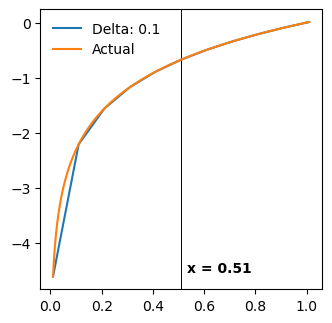

In [9]:
gen_plot(3, [0.1], 0.51, 10)

### Numerical first derivative for delta of 0.1

In [10]:
derivs_1d = []
for d, delta in enumerate([0.1]):
    df = do_derivs(delta, base=0.51, steps=10)
    df['index'] = d
    derivs_1d.append(df)
derivs_1d = pd.concat(derivs_1d, axis=1).T
derivs_1d['index'] = derivs_1d['index'].astype(int)
derivs_1d

,actual,delta,two-point,four-point,six-point,eight-point,index
0,1.960784,0.1,1.986509,1.958101,1.961712,1.959824,0


### Numerical second derivative for delta of 0.1

In [11]:
derivs_2d = []
for d, delta in enumerate([0.1]):
    df = do_derivs(delta, base=0.51, steps=10, first=False)
    df['index'] = d
    derivs_2d.append(df)
derivs_2d = pd.concat(derivs_2d, axis=1).T
derivs_2d['index'] = derivs_2d['index'].astype(int)
derivs_2d

,actual,delta,two-point,four-point,six-point,eight-point,index
0,-3.844675,0.1,-3.920533,-3.835843,-3.847904,-3.841204,0
